#Data preprocessing -before ML model

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


P

In [57]:
df=pd.read_csv("car_data.csv")
df


,year,brand,model_name,price,distance_travelled(kms),fuel_type,city
0,2016,Honda,Brio,425000,9680,Petrol,Mumbai
1,2012,Nissan,Sunny,325000,119120,Diesel,Mumbai
2,2017,Toyota,Fortuner,2650000,64593,Diesel,Thane
3,2017,Mercedes-Benz,E-Class,4195000,25000,Diesel,Mumbai
4,2012,Hyundai,Verna,475000,23800,Diesel,Mumbai
...,...,...,...,...,...,...,...
5170,2015,Hyundai,Eon,290000,38000,Petrol,Pune
5171,2011,Bentley,Continental,7500000,36000,Petrol,Pune
5172,2008,Mahindra-Renault,Logan,185000,142522,Diesel,Pune
5173,1990,Mahindra,Jeep,325000,18581,Diesel,Pune


step:3 sanity check data (check null ,outliers and many more)

In [58]:
df.shape

(5175, 7)

In [59]:
# Check for missing values
print(df.isnull().sum())

year                       0
brand                      0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
dtype: int64


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   year                     5175 non-null   int64 
 1   brand                    5175 non-null   object
 2   model_name               5175 non-null   object
 3   price                    5175 non-null   int64 
 4   distance_travelled(kms)  5175 non-null   int64 
 5   fuel_type                5175 non-null   object
 6   city                     5175 non-null   object
dtypes: int64(3), object(4)
memory usage: 283.1+ KB


In [61]:
#desplay the missing value  count
print("missing value count:")
print(df.isnull().sum())

missing value count:
year                       0
brand                      0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
dtype: int64


In [62]:
print("missing value count:")
print(df.isnull().sum()/df.shape[0]*100)

missing value count:
year                       0.0
brand                      0.0
model_name                 0.0
price                      0.0
distance_travelled(kms)    0.0
fuel_type                  0.0
city                       0.0
dtype: float64


In [63]:
df.duplicated().sum()

3880

In [64]:
df.loc[df.duplicated(keep=False)]

,year,brand,model_name,price,distance_travelled(kms),fuel_type,city
0,2016,Honda,Brio,425000,9680,Petrol,Mumbai
1,2012,Nissan,Sunny,325000,119120,Diesel,Mumbai
2,2017,Toyota,Fortuner,2650000,64593,Diesel,Thane
3,2017,Mercedes-Benz,E-Class,4195000,25000,Diesel,Mumbai
4,2012,Hyundai,Verna,475000,23800,Diesel,Mumbai
...,...,...,...,...,...,...,...
5170,2015,Hyundai,Eon,290000,38000,Petrol,Pune
5171,2011,Bentley,Continental,7500000,36000,Petrol,Pune
5172,2008,Mahindra-Renault,Logan,185000,142522,Diesel,Pune
5173,1990,Mahindra,Jeep,325000,18581,Diesel,Pune


In [65]:
df.drop_duplicates(keep=False)
df.drop_duplicates(keep="last")
df.drop_duplicates(keep="first")
df.drop_duplicates(keep='first',inplace=True)
df

,year,brand,model_name,price,distance_travelled(kms),fuel_type,city
0,2016,Honda,Brio,425000,9680,Petrol,Mumbai
1,2012,Nissan,Sunny,325000,119120,Diesel,Mumbai
2,2017,Toyota,Fortuner,2650000,64593,Diesel,Thane
3,2017,Mercedes-Benz,E-Class,4195000,25000,Diesel,Mumbai
4,2012,Hyundai,Verna,475000,23800,Diesel,Mumbai
...,...,...,...,...,...,...,...
1720,2015,Hyundai,Eon,290000,38000,Petrol,Pune
1721,2011,Bentley,Continental,7500000,36000,Petrol,Pune
1722,2008,Mahindra-Renault,Logan,185000,142522,Diesel,Pune
1723,1990,Mahindra,Jeep,325000,18581,Diesel,Pune


In [66]:
#check the duplicate values
print("check the  duplicate value")
print(df.duplicated().sum())

check the  duplicate value
0


In [67]:
#identify the garbage value
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("****"*10)

brand
Maruti Suzuki       221
Hyundai             214
Honda               117
Mercedes-Benz       107
Toyota               88
BMW                  79
Audi                 72
Mahindra             67
Volkswagen           58
Ford                 53
Skoda                33
Tata                 33
Renault              31
Jaguar               21
Land Rover           19
Volvo                11
MG                   10
Kia                   9
Nissan                9
MINI                  7
Chevrolet             7
Jeep                  7
Porsche               5
Mitsubishi            4
Bentley               3
Datsun                3
Lexus                 2
Fiat                  2
Lamborghini           1
Isuzu                 1
Mahindra-Renault      1
Name: count, dtype: int64
****************************************
model_name
Creta        56
City         51
Innova       50
Swift        50
Grand        33
             ..
Aspire        1
Freestyle     1
4.4           1
XL6           1
Jeep        

In [68]:
#description fun  only numeric value apply
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1295.0,2.015256e+03,3.252914e+00,1990.0,2013.0,2016.0,2018.0,2021.0
price,1295.0,1.481593e+06,1.722747e+06,62500.0,525000.0,850000.0,1797500.0,14700000.0
distance_travelled(kms),1295.0,5.526580e+04,4.737161e+04,350.0,30000.0,50192.0,72000.0,790000.0


Check Data distribution
Exploratory data anlaysis


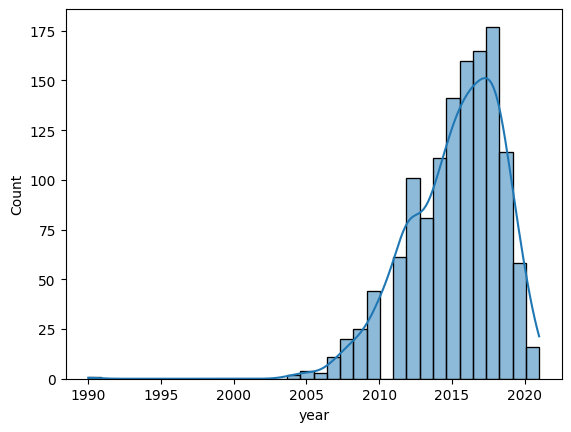

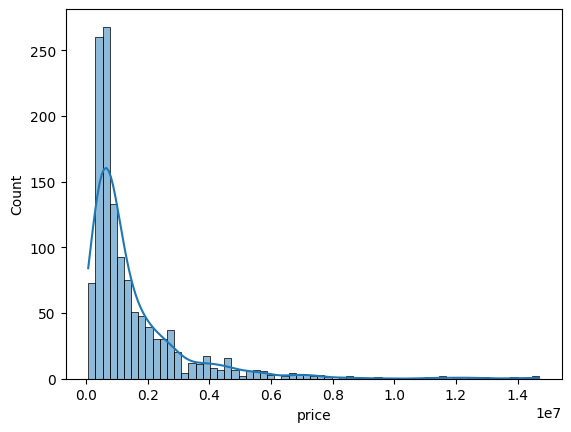

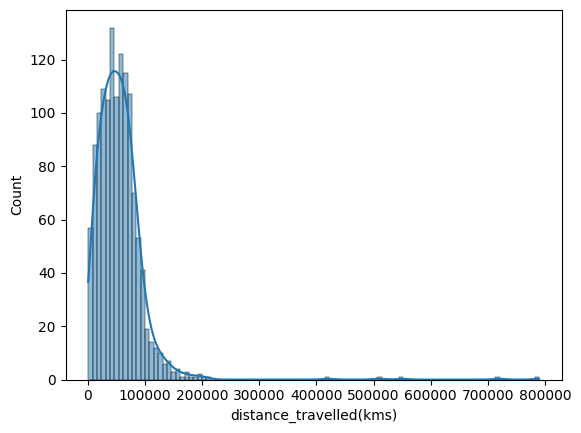

In [69]:
import warnings
warnings.filterwarnings("ignore")
for  i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

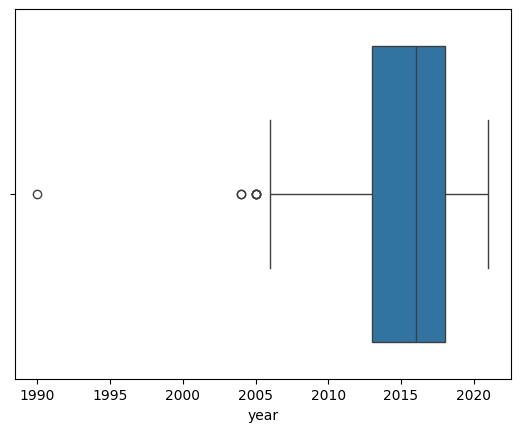

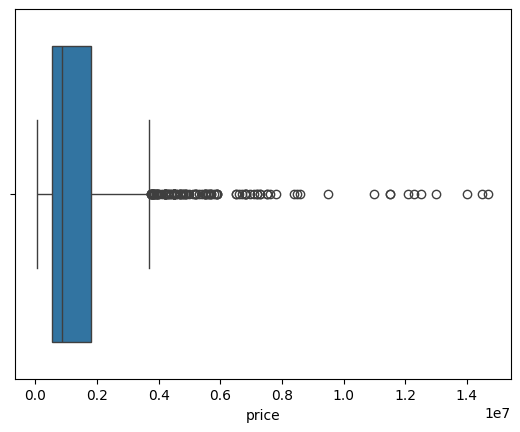

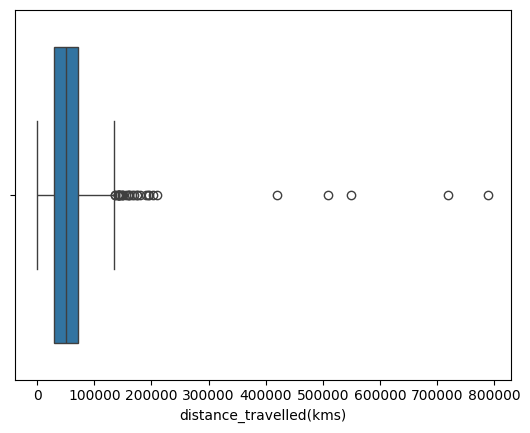

In [70]:
#identify outlier
import warnings
warnings.filterwarnings("ignore")
for  i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [71]:
#Relationship between target vector and features matrix
df.select_dtypes(include="number").columns

Index(['year', 'price', 'distance_travelled(kms)'], dtype='object')

In [72]:
target = 'medv'
f_list = list(df.columns)
f_list.remove('price')

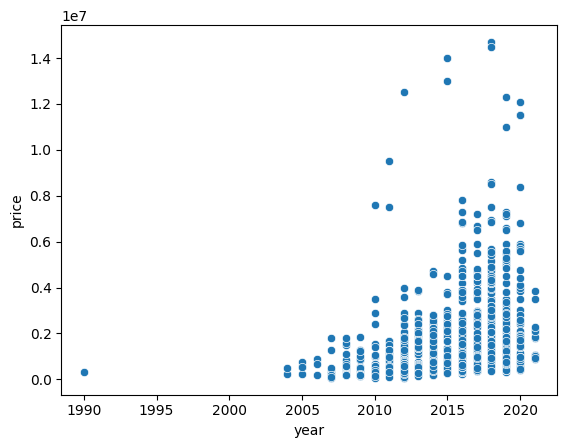

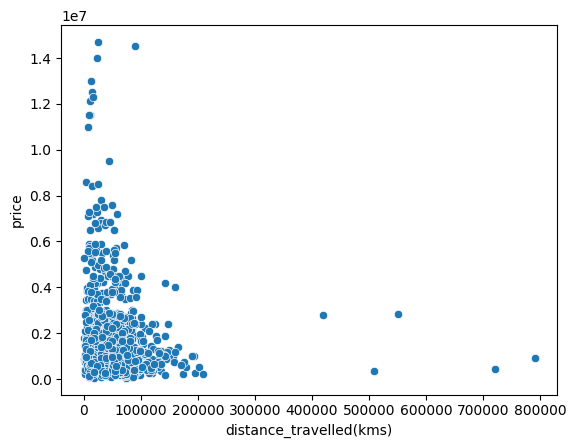

In [73]:
for i in ['year','distance_travelled(kms)']:
    sns.scatterplot(data=df,x=i,y='price')
    plt.show()

In [74]:
df.select_dtypes(include="number").corr()

,year,price,distance_travelled(kms)
year,1.000000,0.298756,-0.367457
price,0.298756,1.000000,-0.147788
distance_travelled(kms),-0.367457,-0.147788,1.000000


<Axes: >

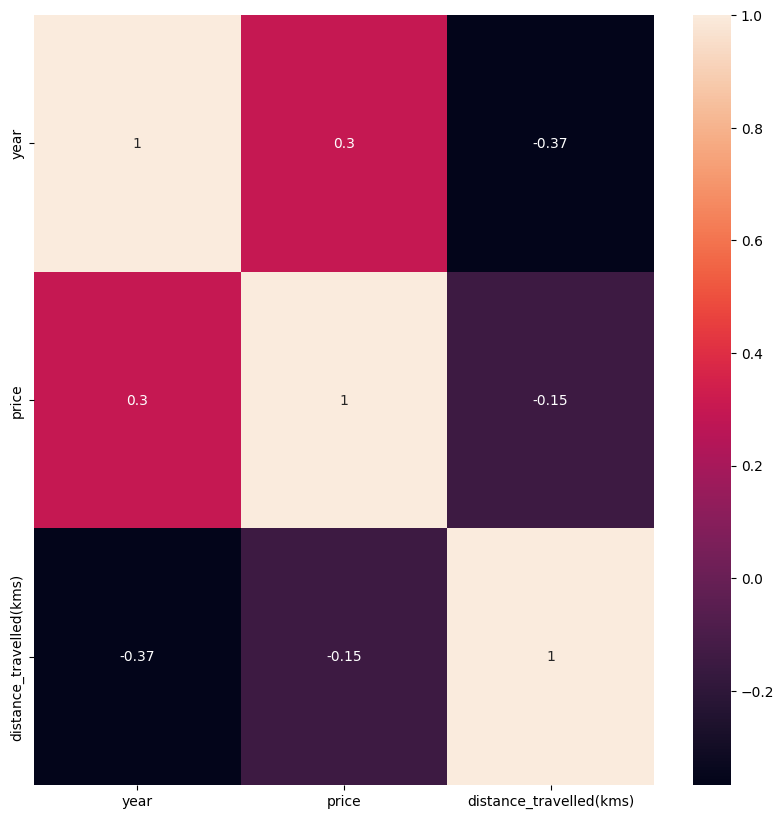

In [75]:
s=df.select_dtypes(include="number").corr()
plt.figure(figsize=(10,10))
sns.heatmap(s,annot=True)

Missing value treatments
missing value fill using this method mean ,median ,mode, knnimputer

In [76]:
df.isnull().sum()

,0
year,0
brand,0
model_name,0
price,0
distance_travelled(kms),0
fuel_type,0
city,0


Steps:5 Missing values treatment

remove outlier treatment

In [77]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw


In [78]:
wisker(df['price'])


(-1383750.0, 3706250.0)

In [79]:
for i in ['year', 'price', 'distance_travelled(kms)']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])


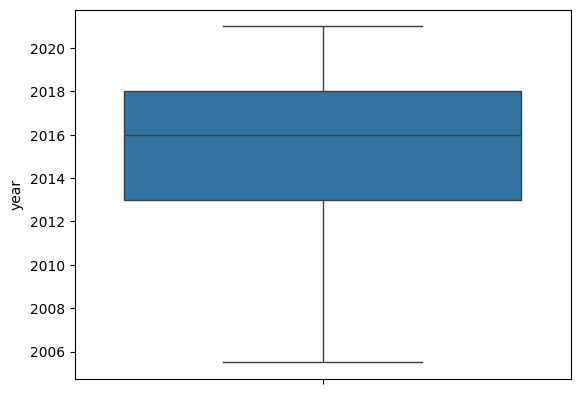

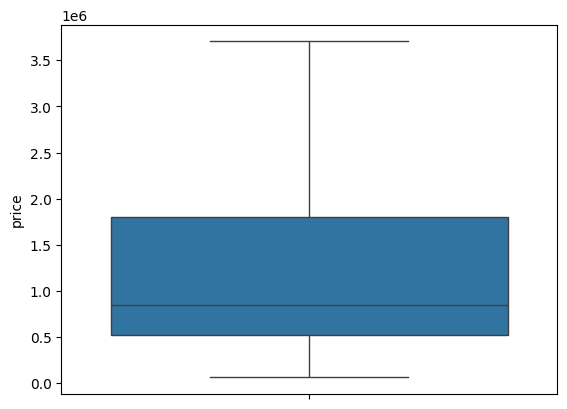

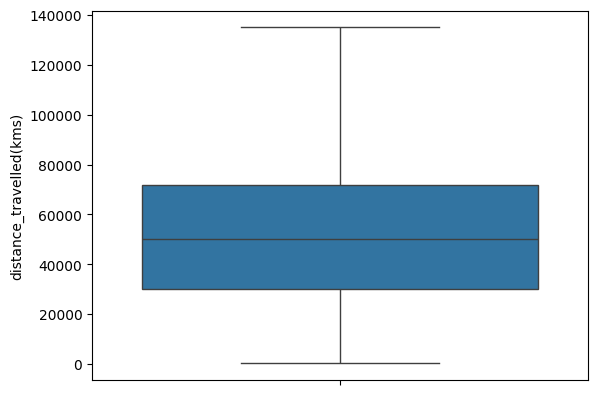

In [80]:
for i in ['year', 'price', 'distance_travelled(kms)']:
    sns.boxplot(df[i])
    plt.show()


In [81]:
df

,year,brand,model_name,price,distance_travelled(kms),fuel_type,city
0,2016.0,Honda,Brio,425000.0,9680.0,Petrol,Mumbai
1,2012.0,Nissan,Sunny,325000.0,119120.0,Diesel,Mumbai
2,2017.0,Toyota,Fortuner,2650000.0,64593.0,Diesel,Thane
3,2017.0,Mercedes-Benz,E-Class,3706250.0,25000.0,Diesel,Mumbai
4,2012.0,Hyundai,Verna,475000.0,23800.0,Diesel,Mumbai
...,...,...,...,...,...,...,...
1720,2015.0,Hyundai,Eon,290000.0,38000.0,Petrol,Pune
1721,2011.0,Bentley,Continental,3706250.0,36000.0,Petrol,Pune
1722,2008.0,Mahindra-Renault,Logan,185000.0,135000.0,Diesel,Pune
1723,2005.5,Mahindra,Jeep,325000.0,18581.0,Diesel,Pune


In [82]:
X=df.drop(['price'],axis=1)
y=df['price']

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [85]:
#pieplining
numeric_preprocessor=Pipeline(steps=[
    ("imputer_mean",SimpleImputer(missing_values=np.nan,strategy='mean')),
    ('scaler',StandardScaler()),
])

In [86]:
categorical_preprocessor=Pipeline(steps=[
    ("imputation_constant",SimpleImputer(fill_value="missing",strategy='constant')),
    ('onehot',OneHotEncoder(handle_unknown="ignore")),
])

In [87]:
preprocessor = ColumnTransformer(
    [('numeric', numeric_preprocessor, ['year', 'distance_travelled(kms)']),
     ('categorical', categorical_preprocessor, ['model_name', 'brand', 'fuel_type', 'city'])
    ]
)

In [88]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [89]:
from sklearn import set_config
set_config(display='diagram')

In [90]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year',
                                                   'distance_travelled(kms)']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['model_name', 'brand',
                                                   'fuel_type', 'city'])])),
                ('regressor', RandomForestRegressor())])

In [91]:
print(X_train.columns)

Index(['year', 'brand', 'model_name', 'distance_travelled(kms)', 'fuel_type',
       'city'],
      dtype='object')


In [92]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year',
                                                   'distance_travelled(kms)']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['model_name', 'brand',
                                                   'fuel_type', 'city'])])),
                ('regressor', RandomForestRegressor())])

In [93]:
y_pred = pipe.predict(X_test)

In [94]:
pipe.score(X_test,y_test)

0.8607849881654277

In [95]:
pipe.score(X_train,y_train)

0.9751370040419918

In [109]:
import pandas as pd

# Create a DataFrame with the correct column names
sample_data = pd.DataFrame({
    'year': [2016],  # Year of the car
    'brand': [1],  # Example: 2 corresponds to 'Toyota' (make sure the encoding is done properly in the pipeline)
    'model_name': [1],  # Example: 1 corresponds to 'Innova'
    'distance_travelled(kms)': [9680],  # Distance traveled
    'fuel_type': [0],  # Example: 0 corresponds to 'Diesel'
    'city': [1]  # Example: 4 corresponds to 'Mumbai'
})

# Perform the prediction using the pipeline
prediction = pipe.predict(sample_data)

# Output the predicted price
print(f"The predicted price for the car is: {prediction[0]:.2f}")


The predicted price for the car is: 558300.00


In [96]:
import warnings
warnings.filterwarnings("ignore")

In [97]:
##Hyperameter Tuninng
param_grid = {
    "regressor__n_estimators": [200,500],
    "regressor__max_features": ["auto", "sqrt", "log2"],
    "regressor__max_depth": [4, 5, 6, 7, 8],
}

In [98]:
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)

In [99]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer_mean',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'distance_travelled(kms)']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputation_constant',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['model_name',
                                                                          'brand',
                                                                          'fuel_type',
                                                                          'city'])])),
                                       ('regressor', RandomForestRegressor())]),
             param_grid={'regressor__max_depth': [4, 5, 6, 7, 8],
                         'regressor__max_features': ['auto', 'sqrt', 'log2'],
                         'regressor__n_estimators': [200, 500]})

In [ ]:
grid_search.best_params_

{'regressor__max_depth': 8,
 'regressor__max_features': 'sqrt',
 'regressor__n_estimators': 500}

In [ ]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(max_depth=6,max_features='sqrt',n_estimators=400))
])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year',
                                                   'distance_travelled(kms)']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['model_name', 'brand',
                                                   'fuel_type', 'city'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=6, max_features='sqrt',
                                       n_estimators=400))])

In [ ]:
y_pred = pipe.predict(X_test)
y_pred[:10]

array([1867332.19220952,  831140.86953562, 2123763.78350714,
       1192194.60849346, 1194350.76792908, 1702086.19286455,
       1007888.25667866, 2148871.70929121, 1981373.30865684,
        730946.15828454,  729212.33143387,  823948.58603937,
        981700.36983232, 1396764.32452709, 1271412.44771409,
       1564351.21606235, 1056144.99315831,  997707.96159806,
        749311.21853511,  850745.0229059 , 1477741.30514991,
       1066439.98530625, 1010451.96632162, 1440940.29102414,
       1199555.59531791, 1660378.38496857, 1496638.76688478,
       1632798.73230747, 1062278.16343276, 1180969.10103097,
       1126543.84150222,  893822.90934706,  865294.29631569,
        952754.20384383, 2282181.40140105, 1028765.79845937,
       1102530.09074572, 1134582.12262746, 1670621.51913531,
        798515.76988481,  899079.58813129,  953361.52553677,
        865310.90557219, 1545918.41053035,  861604.06321038,
       1332955.91969739,  753996.41744078, 1322466.65743176,
       1165879.85063416,

In [ ]:
pipe.score(X_test,y_test)

0.4607320868484105

In [ ]:
pipe.score(X_train,y_train)

0.5059458949915647

In [110]:
import joblib
joblib.dump(pipe,"car_price_prediction.pkl")

['car_price_prediction.pkl']